#  <font color='blue'> Reading Datasets

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the values from the test and train dataset
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")

In [3]:
#checking the head of train dataset
data1.head(10)

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,124,37,1,159,56,75,162,339,141,96,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,54,52,0,165,80,88,202,369,113,97,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,298,12,1,165,47,91,0,359,152,0,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,311,80,0,160,70,90,201,404,157,111,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,230,72,0,171,74,77,172,330,140,104,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,134,41,1,155,56,80,134,362,156,58,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,12,54,1,172,58,78,155,382,163,81,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,388,44,0,170,84,188,125,458,261,75,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,392,51,1,165,85,81,158,357,148,109,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,76,45,0,177,72,94,164,431,158,81,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


In [4]:
#checking the head of test dataset
data2.head(10)

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,9,50,1,167,67,89,130,383,156,73,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,25,44,0,169,80,109,128,382,195,60,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,31,58,1,163,68,71,136,339,152,76,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,32,50,1,160,73,75,125,353,183,63,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,39,45,0,175,80,94,163,401,159,106,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9
5,47,30,1,158,57,73,137,369,143,77,...,-0.6,0.0,9.5,0.0,0,0,0.4,0.5,22.8,26.0
6,70,37,1,155,60,76,166,384,172,100,...,-0.1,0.0,7.7,0.0,0,0,0.6,1.9,26.1,40.5
7,72,31,1,161,73,93,173,361,164,108,...,0.0,-0.7,8.5,0.0,0,0,0.7,1.5,31.5,43.5
8,87,40,0,162,65,114,191,383,222,98,...,-0.1,-1.6,8.8,-1.2,0,0,0.6,-0.6,14.0,9.0
9,88,68,0,161,70,170,192,419,264,116,...,-2.0,0.0,10.1,-2.6,0,0,0.0,-3.3,46.7,2.5


#  <font color='blue'> Exploratory Data Analysis and Imputation

In [5]:
#checking the shape of train dataset
data1.shape

(400, 281)

In [6]:
#checking the shape of test dataset
data2.shape

(52, 280)

In [7]:
#checking the number of observations in each class within the train dataset
data1.groupby('class').size()

class
1     214
2      39
3      13
4      12
5      13
6      23
7       3
8       2
9       8
10     48
14      4
15      2
16     19
dtype: int64

Based on the above, no people were categorized in classes 11,12 and 13

In [8]:
#replacing '?' with NaN
data1 = data1[data1 != '?']
data2 = data2[data2 != '?']

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [9]:
#Checking columns which have null values and the number and % of missing values in each of them
print('Columns with Null values:', data1.columns[data1.isnull().any()])
print('')
print('T missing values number:',data1['T'].isna().sum(), ', T missing values %', data1['T'].isna().sum()/data1.shape[0]*100.00)
print('P missing values number:',data1['P'].isna().sum(), ', P missing values %', data1['P'].isna().sum()/data1.shape[0]*100.00)
print('QRST missing values number:',data1['QRST'].isna().sum(), ', QRST missing values %', data1['QRST'].isna().sum()/data1.shape[0]*100.00)
print('J missing values number:',data1['J'].isna().sum(), ', J missing values %', data1['J'].isna().sum()/data1.shape[0]*100.00)
print('heartrate missing values number:',data1['heartrate'].isna().sum(), ', heartrate missing values %', data1['heartrate'].isna().sum()/data1.shape[0]*100.00)


Columns with Null values: Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

T missing values number: 7 , T missing values % 1.7500000000000002
P missing values number: 17 , P missing values % 4.25
QRST missing values number: 1 , QRST missing values % 0.25
J missing values number: 333 , J missing values % 83.25
heartrate missing values number: 1 , heartrate missing values % 0.25


In [10]:
#checking how many null values are present in data2 - test dataset
print('Columns with Null values:', data2.columns[data2.isnull().any()])
print('')
print('T missing values number:',data2['T'].isna().sum(), ', T missing values %', data2['T'].isna().sum()/data2.shape[0]*100.00)
print('P missing values number:',data2['P'].isna().sum(), ', P missing values %', data2['P'].isna().sum()/data2.shape[0]*100.00)
print('J missing values number:',data2['J'].isna().sum(), ', J missing values %', data2['J'].isna().sum()/data2.shape[0]*100.00)


Columns with Null values: Index(['T', 'P', 'J'], dtype='object')

T missing values number: 1 , T missing values % 1.9230769230769231
P missing values number: 5 , P missing values % 9.615384615384617
J missing values number: 43 , J missing values % 82.6923076923077


In [11]:
#checking the info of columns - data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 281 entries, Unnamed: 0 to class
dtypes: float64(116), int64(160), object(5)
memory usage: 878.2+ KB


In [12]:
#checking the info of columns - data2  
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 280 entries, Unnamed: 0 to chV6_QRSTA
dtypes: float64(106), int64(171), object(3)
memory usage: 113.9+ KB


In [13]:
#Checking which columns are of object data type in train and test set
print(data1.describe(include=['O'])) 
print(data2.describe(include=['O'])) 

          T    P QRST   J heartrate
count   393  383  399  67       399
unique  159   93  127  62        62
top      52   60   55  84        73
freq     13   21    9   3        19
         T   P     J
count   51  47     9
unique  44  33     9
top     56  70  -162
freq     3   3     1


In [14]:
#changing datatype of object columns to float in both train and test data
data1['T'] = data1['T'].astype(float)
data1['P'] = data1['P'].astype(float)
data1['QRST'] = data1['QRST'].astype(float)
data1['J'] = data1['J'].astype(float)
data1['heartrate'] = data1['heartrate'].astype(float)

data2['T'] = data2['T'].astype(float)
data2['P'] = data2['P'].astype(float)
data2['J'] = data2['J'].astype(float)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002831DF92EE0>,
      dtype=object)

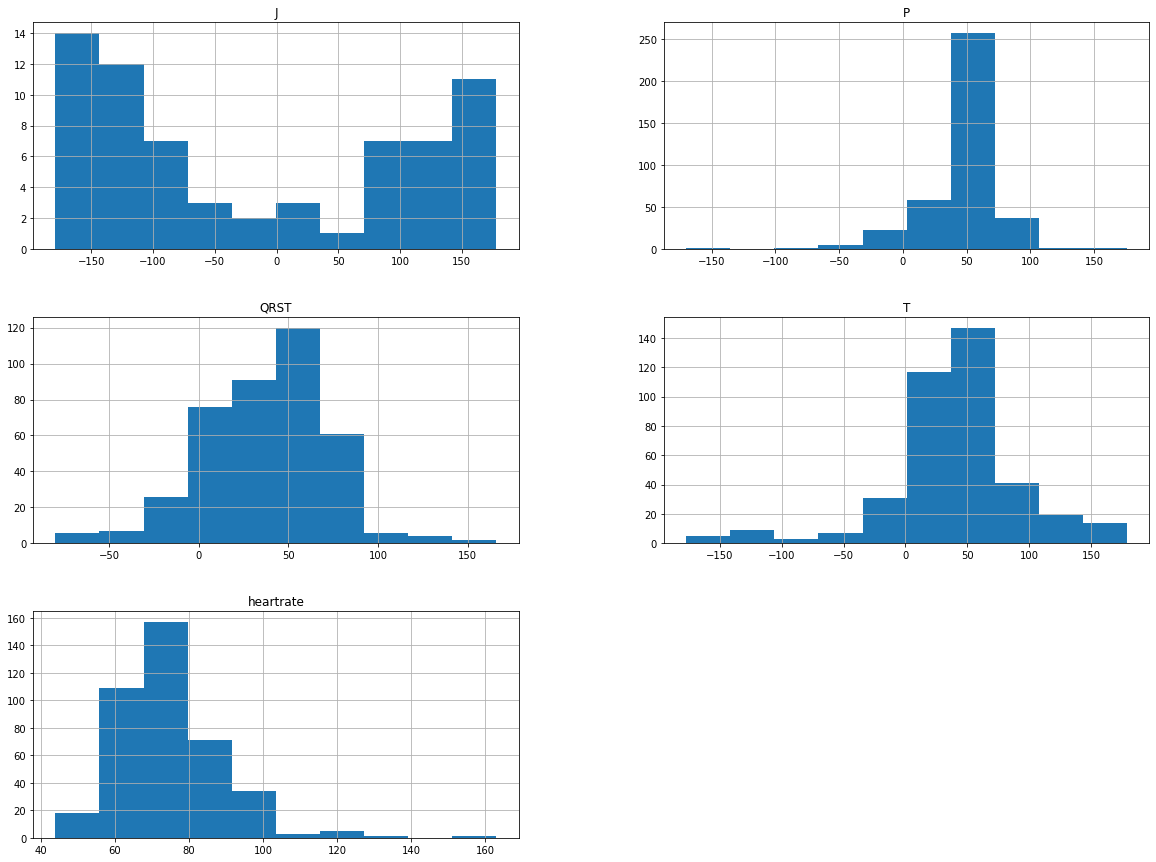

In [15]:
#Histograms of columns with missing values in train data
data1.hist(bins=10, figsize=(20, 15), column=['T','P','QRST','J','heartrate'])



In [16]:
#Dropping column 'J' from the train data set as 83% of its values are missing
data1=data1.drop(columns=['J'], axis=1) 

#Dropping column 'Unnamed: 0' from the train data set as it is a unique identifier column
print(data1['Unnamed: 0'].nunique())
data1=data1.drop(columns=['Unnamed: 0'], axis=1) 



400


In [17]:
#imputing the remaining columns in the train data containing missing values with their respective column means
data1['P'] = data1['P'].fillna((data1['P'].mean()))
data1['QRST'] = data1['QRST'].fillna((data1['QRST'].mean()))
data1['T'] = data1['T'].fillna((data1['T'].mean()))
data1['heartrate'] = data1['heartrate'].fillna((data1['heartrate'].mean()))


In [18]:
#Checking to see if there are any columns left with missing values in train data
print('Columns with Null values:', data1.columns[data1.isnull().any()])

print('')
print('T missing values number:',data1['T'].isna().sum(), ', T missing values %', data1['T'].isna().sum()/data1.shape[0]*100.00)
print('P missing values number:',data1['P'].isna().sum(), ', P missing values %', data1['P'].isna().sum()/data1.shape[0]*100.00)
print('QRST missing values number:',data1['QRST'].isna().sum(), ', QRST missing values %', data1['QRST'].isna().sum()/data1.shape[0]*100.00)
print('heartrate missing values number:',data1['heartrate'].isna().sum(), ', heartrate missing values %', data1['heartrate'].isna().sum()/data1.shape[0]*100.00)


Columns with Null values: Index([], dtype='object')

T missing values number: 0 , T missing values % 0.0
P missing values number: 0 , P missing values % 0.0
QRST missing values number: 0 , QRST missing values % 0.0
heartrate missing values number: 0 , heartrate missing values % 0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028320900880>,
      dtype=object)

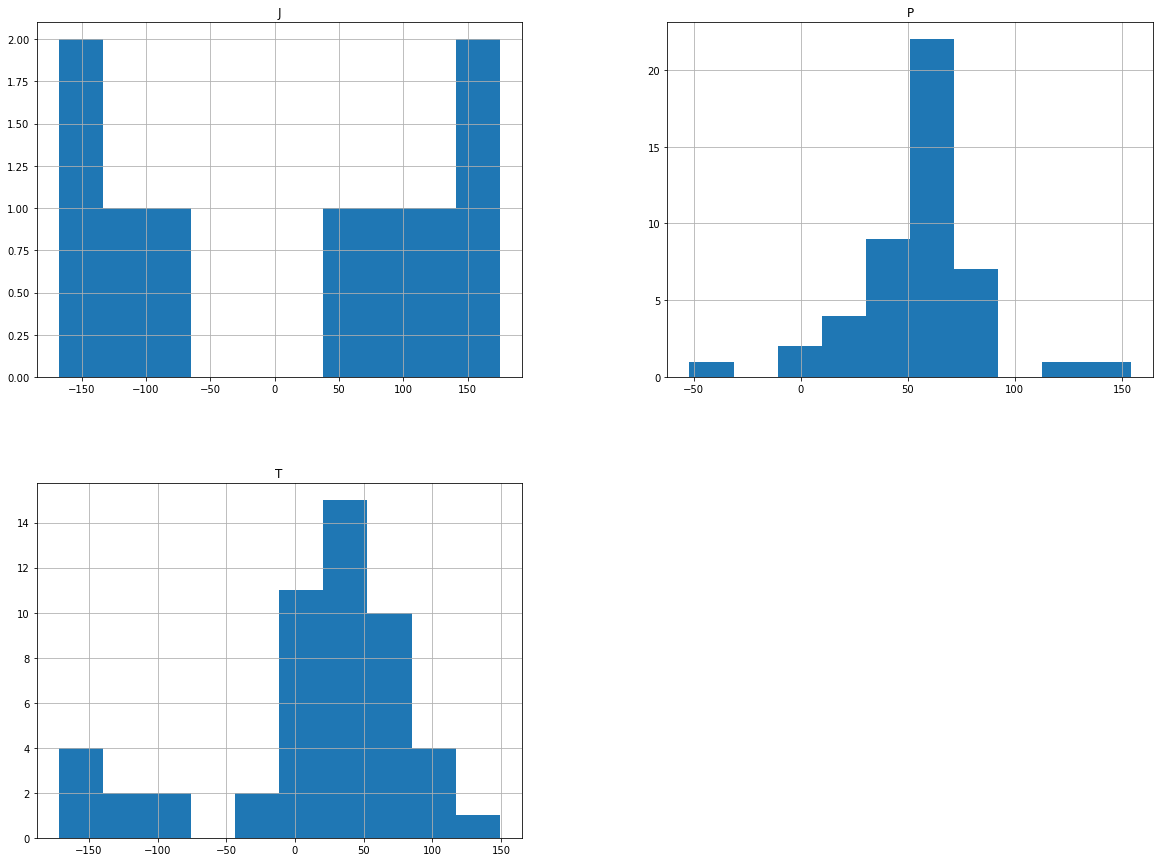

In [19]:
#Histograms of columns with missing values in test data
data2.hist(bins=10, figsize=(20, 15), column=['T','P','J'])

In [20]:
#Dropping column 'J' from the test data set as 82% of its values are missing
data2=data2.drop(columns=['J'], axis=1) 

#Dropping column 'Unnamed: 0' from the test data set as it is a unique identifier column
print(data2['Unnamed: 0'].nunique())
data2=data2.drop(columns=['Unnamed: 0'], axis=1) 


52


In [21]:
#imputing the remaining columns in the test data containing missing values with their respective column means
data2['P'] = data2['P'].fillna((data2['P'].mean()))
data2['T'] = data2['T'].fillna((data2['T'].mean()))
#Below 2 lines will not effect our data. They are only added to ensure that pre-processing steps for data1 and data2 are the same.
data2['QRST'] = data2['QRST'].fillna((data2['QRST'].mean()))
data2['heartrate'] = data2['heartrate'].fillna((data2['heartrate'].mean()))



In [22]:
#Checking to see if there are any columns left with missing values in test data
print('Columns with Null values:', data2.columns[data2.isnull().any()])

print('')
print('T missing values number:',data2['T'].isna().sum(), ', T missing values %', data2['T'].isna().sum()/data2.shape[0]*100.00)
print('P missing values number:',data2['P'].isna().sum(), ', P missing values %', data2['P'].isna().sum()/data2.shape[0]*100.00)


Columns with Null values: Index([], dtype='object')

T missing values number: 0 , T missing values % 0.0
P missing values number: 0 , P missing values % 0.0


In [23]:
#checking the info of columns - data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 279 entries, age to class
dtypes: float64(120), int64(159)
memory usage: 872.0 KB


In [24]:
#checking the info of columns - data1
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 278 entries, age to chV6_QRSTA
dtypes: float64(108), int64(170)
memory usage: 113.1 KB


All missing values have been imputed and our data now consists of entirely numeric values, hence we move on the next stage which is splitting our train data and using it to training our models. 

# <font color='blue'> Using train_test_split and scaling the resulting datasets

In [25]:
#splitting featureset and target variable
TargetV= data1['class']
xdataV = data1.iloc[:,0:278] 
print('Feature Set')
print(xdataV)
print('Target Values')
print(TargetV)

Feature Set
     age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0     37    1     159      56           75         162          339   
1     52    0     165      80           88         202          369   
2     12    1     165      47           91           0          359   
3     80    0     160      70           90         201          404   
4     72    0     171      74           77         172          330   
..   ...  ...     ...     ...          ...         ...          ...   
395   53    1     155      63           74         165          386   
396   60    1     158      75           91         137          387   
397   56    1     164      65           90         164          420   
398   57    0     175      80           98         157          304   
399   68    1     146      62          146         200          448   

     Tinterval  Pinterval  QRS  ...  chV6_JJwaveAmp  chV6_QwaveAmp  \
0          141         96   60  ...             0.0            0.

Target Values Counts
Dimensions of X_train (300, 278)


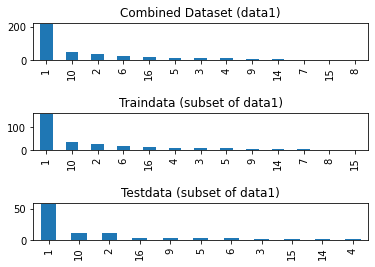

In [26]:
#Splitting train dataset into test and train subsets which are then scaled and which will be used to train and evaluate our models
X_train_setC, X_test_setC, y_train_setC, y_test_setC = train_test_split(xdataV, TargetV, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_setC)
X_test = scaler.transform(X_test_setC) 
data2_scaled = scaler.transform(data2)

print('Target Values Counts')
plt.subplot(5, 1, 1)
TargetV.value_counts().plot(kind='bar', title='Combined Dataset (data1)');
plt.subplot(5, 1, 3)
y_train_setC.value_counts().plot(kind='bar', title='Traindata (subset of data1)');
plt.subplot(5, 1, 5)
y_test_setC.value_counts().plot(kind='bar', title='Testdata (subset of data1)');

print('Dimensions of X_train', X_train.shape)

Based on the above, we can see that majority of the observations belong to class 1, followed by class 10 and class 2 in all three datasets.

# <font color='blue'> Implementing Machine Learning Models using GridsearchCV

# KNeighborsClassifier

In [27]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


param_grid = {'n_neighbors': np.arange(1, 21)}
NknC_reg_gsR = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring= 'precision_macro', return_train_score=True)
NknC_reg_gsA = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

NknC_reg_gsR.fit(X_train,y_train_setC)
NknC_reg_gsA.fit(X_train,y_train_setC)
#print(NknC_reg_gsR.best_score_)
#print(NknC_reg_gsA.best_score_)


print('Model (1) based on best precision_macro Score parameter')
# rebuild a model using best parameters(based on precision_macro score)
NknC_reg_gs1 = KNeighborsClassifier(**NknC_reg_gsR.best_params_)
NknC_reg_gs1.fit(X_train, y_train_setC)
Ny_pred_knC_reg_gs1= NknC_reg_gs1.predict(X_test)
print("Best parameters: {}".format(NknC_reg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(NknC_reg_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(NknC_reg_gs1.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_knC_reg_gs1, average='macro')))

print('')
print('Model (2) Based on best Accuracy Score parameter')
# rebuild a model using best parameters(based on accuracy score)
NknC_reg_gs2 = KNeighborsClassifier(**NknC_reg_gsA.best_params_)
NknC_reg_gs2.fit(X_train, y_train_setC)
Ny_pred_knC_reg_gs2= NknC_reg_gs2.predict(X_test)
print("Best parameters: {}".format(NknC_reg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(NknC_reg_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(NknC_reg_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_knC_reg_gs2, average='macro')))





c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) based on best precision_macro Score parameter
Best parameters: {'n_neighbors': 1}
Train accuracy score: 1.00
Test accuracy score: 0.55
Test macro precision score: 0.24

Model (2) Based on best Accuracy Score parameter
Best parameters: {'n_neighbors': 3}
Train accuracy score: 0.67
Test accuracy score: 0.61
Test macro precision score: 0.25


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Softmax/Multilabel Logistic Regression

In [28]:
 %matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'solver':['lbfgs'],
              'multi_class':['auto'],
              'max_iter' : [5000]
             }
Nlogreg_gsR = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
Nlogreg_gsA = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

Nlogreg_gsR.fit(X_train,y_train_setC)
Nlogreg_gsA.fit(X_train,y_train_setC)
 
#print(Nlogreg_gsR.best_score_)
#print(Nlogreg_gsA.best_score_)
    
print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nlog_reg_gs1 = LogisticRegression(**Nlogreg_gsR.best_params_)
Nlog_reg_gs1.fit(X_train, y_train_setC)
Ny_pred_log_reg_gs1= Nlog_reg_gs1.predict(X_test)
print("Best parameters: {}".format(Nlogreg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nlog_reg_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nlog_reg_gs1.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_log_reg_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score)
Nlog_reg_gs2 = LogisticRegression(**Nlogreg_gsA.best_params_)
Nlog_reg_gs2.fit(X_train, y_train_setC)
Ny_pred_log_reg_gs2= Nlog_reg_gs2.predict(X_test)
print("Best parameters: {}".format(Nlogreg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nlog_reg_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nlog_reg_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_log_reg_gs2, average='macro' )))




    


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\ali_r\appdata\local\programs\python

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 10, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 1.00
Test accuracy score: 0.66
Test macro precision score: 0.43

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.1, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 0.95
Test accuracy score: 0.71
Test macro precision score: 0.45


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LinearSVC()

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'random_state':[0]}
Nlsvc_gsR = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
Nlsvc_gsA = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

Nlsvc_gsR.fit(X_train,y_train_setC)
Nlsvc_gsA.fit(X_train,y_train_setC)

#print(Nlsvc_gsR.best_score_)
#print(Nlsvc_gsA.best_score_)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nl_svc_gs1 = LinearSVC(**Nlsvc_gsR.best_params_)
Nl_svc_gs1.fit(X_train, y_train_setC)
Ny_pred_l_svc_gs1= Nl_svc_gs1.predict(X_test)
print("Best parameters: {}".format(Nlsvc_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nl_svc_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nl_svc_gs1.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_l_svc_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score)
Nl_svc_gs2 = LinearSVC(**Nlsvc_gsA.best_params_)
Nl_svc_gs2.fit(X_train, y_train_setC)
Ny_pred_l_svc_gs2= Nl_svc_gs2.predict(X_test)
print("Best parameters: {}".format(Nlsvc_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nl_svc_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nl_svc_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_l_svc_gs2, average='macro' )))




    


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\users\ali_r\appdata\local\programs\python\python38\li

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.001, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.84
Test accuracy score: 0.67
Test macro precision score: 0.33

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.001, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.84
Test accuracy score: 0.67
Test macro precision score: 0.33


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with rbf kernel

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'kernel':['rbf'],
              'random_state': [0],
              'probability':[True]}
Nsvcrbf_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
Nsvcrbf_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvcrbf_gsR.fit(X_train, y_train_setC)
Nsvcrbf_gsA.fit(X_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nsvc_rbf_gs1 = SVC(**Nsvcrbf_gsR.best_params_)
Nsvc_rbf_gs1.fit(X_train, y_train_setC)
Ny_pred_svc_rbf_gs1= Nsvc_rbf_gs1.predict(X_test)
print("Best parameters: {}".format(Nsvcrbf_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_rbf_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_rbf_gs1.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_rbf_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_rbf_gs2 = SVC(**Nsvcrbf_gsA.best_params_)
Nsvc_rbf_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_rbf_gs2= Nsvc_rbf_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvcrbf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_rbf_gs2, average='macro' )))



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.64
Test macro precision score: 0.41

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 0.91
Test accuracy score: 0.70
Test macro precision score: 0.34


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with Linear kernel

In [31]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40],
              'random_state': [0],
              'kernel':['linear'],
              'probability':[True]}
Nsvclin_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
Nsvclin_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvclin_gsR.fit(X_train, y_train_setC)
Nsvclin_gsA.fit(X_train, y_train_setC)
 


print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nsvc_lin_gs1 = SVC(**Nsvclin_gsR.best_params_)
Nsvc_lin_gs1.fit(X_train, y_train_setC)
Ny_pred_svc_lin_gs1= Nsvc_lin_gs1.predict(X_test)
print("Best parameters: {}".format(Nsvclin_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_lin_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_lin_gs1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_lin_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_lin_gs2 = SVC(**Nsvclin_gsA.best_params_)
Nsvc_lin_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_lin_gs2= Nsvc_lin_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvclin_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_lin_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_lin_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_lin_gs2, average='macro' )))




c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.1, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.99
Test accuracy score: 0.66
Test precision score: 0.34

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.01, 'kernel': 'linear', 'probability': True, 'random_state': 0}


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.85
Test accuracy score: 0.73
Test precision score: 0.44


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with Poly kernel

In [32]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 20],
              'degree': [2,3,4,5],
              'random_state': [0],
              'kernel':['poly'],
              'probability':[True]}
Nsvcpoly_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
Nsvcpoly_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvcpoly_gsR.fit(X_train, y_train_setC)
Nsvcpoly_gsA.fit(X_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nsvc_poly_gs1 = SVC(**Nsvcpoly_gsR.best_params_)
Nsvc_poly_gs1.fit(X_train, y_train_setC)
Ny_pred_svc_poly_gs1= Nsvc_poly_gs1.predict(X_test)
print("Best parameters: {}".format(Nsvcpoly_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_poly_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_poly_gs1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_poly_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_poly_gs2 = SVC(**Nsvcpoly_gsA.best_params_)
Nsvc_poly_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_poly_gs2= Nsvc_poly_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvcpoly_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_poly_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_poly_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_poly_gs2, average='macro' )))







c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.62
Test precision score: 0.31

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.66
Test precision score: 0.40


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
              'random_state': [0]}
Ndtree_gsR = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='precision_macro', return_train_score=True, iid = False)
Ndtree_gsA = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True, iid = False)
Ndtree_gsR.fit(X_train, y_train_setC)
Ndtree_gsA.fit(X_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nd_tree_gs1 = DecisionTreeClassifier(**Ndtree_gsR.best_params_)
Nd_tree_gs1.fit(X_train, y_train_setC)
Ny_pred_d_tree_gs1= Nd_tree_gs1.predict(X_test)
print("Best parameters: {}".format(Ndtree_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nd_tree_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nd_tree_gs1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_d_tree_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nd_tree_gs2 = DecisionTreeClassifier(**Ndtree_gsA.best_params_)
Nd_tree_gs2.fit(X_train, y_train_setC)
Ny_pred_d_tree_gs2= Nd_tree_gs2.predict(X_test)
print("Best parameters: {}".format(Ndtree_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nd_tree_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nd_tree_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_d_tree_gs2, average='macro' )))





c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'max_depth': 10, 'random_state': 0}
Train accuracy score: 0.96
Test accuracy score: 0.66
Test precision score: 0.33

Model (2) Based on best Accuracy Score parameters
Best parameters: {'max_depth': 5, 'random_state': 0}
Train accuracy score: 0.83
Test accuracy score: 0.66
Test precision score: 0.35


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the test accuracy and test precision scores, 3 models were chosen from above. It should also be noted that models whose parameters were chosen on the basis of accuracy (via GridSearchCV) generally gave better results, than the models whose parameters were chosen on the basis of macro_precision (via GridSearchCV)

In [34]:
## Best models:
print('Softmax/Multilabel Logistic Regression (Model 2)')
print("Best parameters: {}".format(Nlogreg_gsA.best_params_))
print('Train accuracy score: {:.5f}'.format(Nlog_reg_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.5f}'.format(Nlog_reg_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.5f}'.format(precision_score(y_test_setC, Ny_pred_log_reg_gs2, average='macro' )))
print('')
print('SVM with Linear Kernel (Model 2)')
print("Best parameters: {}".format(Nsvclin_gsA.best_params_))
print('Train accuracy score: {:.5f}'.format(Nsvc_lin_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.5f}'.format(Nsvc_lin_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.5f}'.format(precision_score(y_test_setC, Ny_pred_svc_lin_gs2, average='macro' )))
print('')
print('SVM with RBF Kernel (Model 2)')
print("Best parameters: {}".format(Nsvcrbf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_svc_rbf_gs2, average='macro' )))

Softmax/Multilabel Logistic Regression (Model 2)
Best parameters: {'C': 0.1, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 0.95333
Test accuracy score: 0.71000
Test macro precision score: 0.44995

SVM with Linear Kernel (Model 2)
Best parameters: {'C': 0.01, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85333
Test accuracy score: 0.73000
Test precision score: 0.44179

SVM with RBF Kernel (Model 2)
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 0.91
Test accuracy score: 0.70
Test macro precision score: 0.34


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <font color='blue'> Ensemble methods

# Using above 3 models in Voting Classifier

Hard Voting

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


Nvoting_clf1 = VotingClassifier(estimators=[('lr', Nlog_reg_gs2), ('svclin', Nsvc_lin_gs2), ('svcrbf', Nsvc_rbf_gs2) ], voting='hard')
Nvoting_clf1.fit(X_train, y_train_setC)

for clf in (Nlog_reg_gs2, Nsvc_lin_gs2, Nsvc_rbf_gs2, Nvoting_clf1):
    clf.fit(X_train, y_train_setC)
    Ny_pred_clf1 = clf.predict(X_test)
    print(clf.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, Ny_pred_clf1))
    print(clf.__class__.__name__,'test precision macro score:',precision_score(y_test_setC, Ny_pred_clf1, average='macro'))
    print('')
    
    
    

LogisticRegression test accuracy score: 0.71
LogisticRegression test precision macro score: 0.4499532585470085

SVC test accuracy score: 0.73
SVC test precision macro score: 0.4417929292929293



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC test accuracy score: 0.7
SVC test precision macro score: 0.3437629721876297



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VotingClassifier test accuracy score: 0.71
VotingClassifier test precision macro score: 0.3982699805068226



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Soft Voting

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


Nvoting_clf2 = VotingClassifier(estimators=[('lr', Nlog_reg_gs2), ('svclin', Nsvc_lin_gs2), ('svcrbf', Nsvc_rbf_gs2) ], voting='soft')
Nvoting_clf2.fit(X_train, y_train_setC)

for clf in (Nlog_reg_gs2, Nsvc_lin_gs2, Nsvc_rbf_gs2, Nvoting_clf2):
    clf.fit(X_train, y_train_setC)
    Ny_pred_clf2 = clf.predict(X_test)
    print(clf.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, Ny_pred_clf2))
    print(clf.__class__.__name__,'test precision macro score:',precision_score(y_test_setC, Ny_pred_clf2, average='macro'))
    print('')
    
    

LogisticRegression test accuracy score: 0.71
LogisticRegression test precision macro score: 0.4499532585470085

SVC test accuracy score: 0.73

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVC test precision macro score: 0.4417929292929293

SVC test accuracy score: 0.7
SVC test precision macro score: 0.3437629721876297



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VotingClassifier test accuracy score: 0.71
VotingClassifier test precision macro score: 0.4146005509641873



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pasting

In [37]:
from sklearn.ensemble import BaggingClassifier
# Pasting with the best 2 models which are Softmax/Multilabel Logistic Regression and SVM with Linear Kernel 

print('Pasting with Softmax/Multilabel Logistic Regression (Model 2)')
Nbag_clf1 = BaggingClassifier(Nlog_reg_gs2, n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1, random_state=0, oob_score=False)
Nbag_clf1.fit(X_train, y_train_setC)
Ny_pred_b1 = Nbag_clf1.predict(X_test)
print('Train accuracy score: {:.2f}'.format(Nbag_clf1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nbag_clf1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_b1, average='macro')))
print('')
print('Pasting with SVM with Linear Kernel (Model 2)')
Nbag_clf2 = BaggingClassifier(Nsvc_lin_gs2, n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1,random_state=0, oob_score=False)
Nbag_clf2.fit(X_train, y_train_setC)
Ny_pred_b2 = Nbag_clf2.predict(X_test)
print('Train accuracy score: {:.2f}'.format(Nbag_clf2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nbag_clf2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_b2, average='macro')))


Pasting with Softmax/Multilabel Logistic Regression (Model 2)
Train accuracy score: 0.95
Test accuracy score: 0.71
Test precision score: 0.45

Pasting with SVM with Linear Kernel (Model 2)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.83
Test accuracy score: 0.72
Test precision score: 0.45


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adaboost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


# Adaboost with Softmax/Multilabel Logistic Regression, SVM with Linear Kernel (best 2 models) and Decision Tree Classifier

print('Adaboost with Softmax/Multilabel Logistic Regression (Model 2)')

Nada_clf1 = AdaBoostClassifier(Nlog_reg_gs2, n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
Nada_clf1.fit(X_train, y_train_setC)
Ny_pred_ada1 = Nada_clf1.predict(X_test)
print('Train accuracy score: {:.2f}'.format(Nada_clf1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nada_clf1.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_ada1, average='macro')))

print('')
print('Adaboost with SVM with Linear Kernel (Model 2)')
Nada_clf2 = AdaBoostClassifier(Nsvc_lin_gs2, n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
Nada_clf2.fit(X_train, y_train_setC)
Ny_pred_ada2 = Nada_clf2.predict(X_test)
print('Train accuracy score: {:.2f}'.format(Nada_clf2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nada_clf2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_ada2, average='macro')))

print('')
print('Adaboost with Decision Tree Classifier (depth not specified for this model)')
Nada_clf3 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
Nada_clf3.fit(X_train, y_train_setC)
Ny_pred_ada3 = Nada_clf3.predict(X_test)
print('Train accuracy score: {:.2f}'.format(Nada_clf3.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nada_clf3.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_ada3, average='macro')))



Adaboost with Softmax/Multilabel Logistic Regression (Model 2)
Train accuracy score: 0.71
Test accuracy score: 0.66
Test recall score: 0.32

Adaboost with SVM with Linear Kernel (Model 2)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.52
Test accuracy score: 0.57
Test recall score: 0.05

Adaboost with Decision Tree Classifier (depth not specified for this model)
Train accuracy score: 1.00
Test accuracy score: 0.65
Test recall score: 0.36


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier

In [39]:
from  sklearn.ensemble import GradientBoostingClassifier


param_grid = {'max_depth': [2,5],
              'n_estimators': [3,700], 
              'learning_rate': [0.1,1],
              'random_state': [0]
             }
Ngbrt_gsR = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
Ngbrt_gsA = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

Ngbrt_gsR.fit(X_train,y_train_setC)
print('')
Ngbrt_gsA.fit(X_train,y_train_setC)


print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Ngbrt_gs1 = GradientBoostingClassifier(**Ngbrt_gsR.best_params_)
Ngbrt_gs1.fit(X_train, y_train_setC)
Ny_pred_gbrt_gs1= Ngbrt_gs1.predict(X_test)
print("Best parameters: {}".format(Ngbrt_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Ngbrt_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Ngbrt_gs1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_gbrt_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Ngbrt_gs2 = GradientBoostingClassifier(**Ngbrt_gsA.best_params_)
Ngbrt_gs2.fit(X_train, y_train_setC)
Ny_pred_gbrt_gs2= Ngbrt_gs2.predict(X_test)
print("Best parameters: {}".format(Ngbrt_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Ngbrt_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Ngbrt_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_gbrt_gs2, average='macro' )))

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-package

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Model (1) Based on best precision_macro Score parameters
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.76
Test precision score: 0.51

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.76
Test precision score: 0.51


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100,200,500],
              'max_leaf_nodes': [10,20,30,50], 
              'n_jobs': [-1],
              'random_state': [0],
             }

Nrf_gsR = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
Nrf_gsA = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

Nrf_gsR.fit(X_train,y_train_setC)
Nrf_gsA.fit(X_train,y_train_setC)

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
Nrf_gs1 = RandomForestClassifier(**Nrf_gsR.best_params_)
Nrf_gs1.fit(X_train, y_train_setC)
Ny_pred_rf_gs1= Nrf_gs1.predict(X_test)
print("Best parameters: {}".format(Nrf_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(Nrf_gs1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nrf_gs1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_rf_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nrf_gs2 = RandomForestClassifier(**Nrf_gsA.best_params_)
Nrf_gs2.fit(X_train, y_train_setC)
Ny_pred_rf_gs2= Nrf_gs1.predict(X_test)
print("Best parameters: {}".format(Nrf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nrf_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nrf_gs2.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, Ny_pred_rf_gs2, average='macro' )))



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-package

Model (1) Based on best precision_macro Score parameters
Best parameters: {'max_leaf_nodes': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
Train accuracy score: 0.99
Test accuracy score: 0.73
Test precision score: 0.45

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'max_leaf_nodes': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
Train accuracy score: 0.99
Test accuracy score: 0.73
Test precision score: 0.45


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Networks

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score


def create_model():
    #create model
    model = Sequential()
    model.add(Dense(50, input_dim=278, activation='relu'))
    model.add(Dense(35, activation='relu'))
    model.add(Dense(13, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 10
np.random.seed(10)


model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
ngrid_search1 = GridSearchCV(estimator= model, param_grid = param_grid, scoring= 'accuracy', cv = 5)
ngrid_search2 = GridSearchCV(estimator= model, param_grid = param_grid, scoring= 'precision_macro', cv = 5)
ngrid_search1.fit(X_train, y_train_setC)
ngrid_search2.fit(X_train, y_train_setC)
ny_pred_grid_search1= ngrid_search1.predict(X_test)
ny_pred_grid_search2= ngrid_search2.predict(X_test)

print('Parameter selection criteria: accuracy')
print("Best parameters: {}".format(ngrid_search1.best_params_))
print('Test accuracy score: {:.2f}'.format(ngrid_search1.score(X_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, ny_pred_grid_search1, average='macro' )))

print('')
print('Parameter selection criteria: precision macro')
print("Best parameters: {}".format(ngrid_search2.best_params_))
print('Test precision score: {:.2f}'.format(ngrid_search2.score(X_test, y_test_setC)))
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, ny_pred_grid_search2 )))

Using TensorFlow backend.
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\wrappers\scikit_learn.py", line 209, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\wrappers\scikit_learn.py", line 151, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 1150, in fit
  

Parameter selection criteria: accuracy
Best parameters: {'batch_size': 10, 'epochs': 10}
Test accuracy score: 0.66
Test precision score: 0.33

Parameter selection criteria: precision macro
Best parameters: {'batch_size': 10, 'epochs': 10}
Test precision score: 0.39
Test accuracy score: 0.63


# <font color='blue'> Applying PCA on our datasets and re-running the above machine learning models

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)
data2_sc_reduced= pca.transform(data2)
print(pca.n_components_)
print(X_reduced_train.shape)
print(X_reduced_test.shape)
print(data2_sc_reduced.shape)


132
(300, 132)
(100, 132)
(52, 132)


# KNeighborsClassifier

In [43]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


param_grid = {'n_neighbors': np.arange(1, 21)}
knC_reg_gsR = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring= 'precision_macro', return_train_score=True)
knC_reg_gsA = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

knC_reg_gsR.fit(X_reduced_train,y_train_setC)
knC_reg_gsA.fit(X_reduced_train,y_train_setC)
#print(NknC_reg_gsR.best_score_)
#print(NknC_reg_gsA.best_score_)


print('Model (1) based on best precision_macro Score parameter')
# rebuild a model using best parameters(based on precision_macro score)
knC_reg_gs1 = KNeighborsClassifier(**knC_reg_gsR.best_params_)
knC_reg_gs1.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg_gs1= knC_reg_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(knC_reg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(knC_reg_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg_gs1.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_knC_reg_gs1, average='macro')))

print('')
print('Model (2) Based on best Accuracy Score parameter')
# rebuild a model using best parameters(based on accuracy score)
knC_reg_gs2 = KNeighborsClassifier(**knC_reg_gsA.best_params_)
knC_reg_gs2.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg_gs2= knC_reg_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(knC_reg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(knC_reg_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg_gs2.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_knC_reg_gs2, average='macro')))





c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) based on best precision_macro Score parameter
Best parameters: {'n_neighbors': 1}
Train accuracy score: 1.00
Test accuracy score: 0.54
Test macro precision score: 0.23

Model (2) Based on best Accuracy Score parameter
Best parameters: {'n_neighbors': 3}
Train accuracy score: 0.67
Test accuracy score: 0.59
Test macro precision score: 0.23


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Softmax/Multilabel Logistic Regression

In [44]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'solver':['lbfgs'],
              'multi_class':['auto'],
              'max_iter' : [5000]
             }
logreg_gsR = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
logreg_gsA = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

logreg_gsR.fit(X_reduced_train,y_train_setC)
logreg_gsA.fit(X_reduced_train,y_train_setC)
 
#print(Nlogreg_gsR.best_score_)
#print(Nlogreg_gsA.best_score_)
    
print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
log_reg_gs1 = LogisticRegression(**logreg_gsR.best_params_)
log_reg_gs1.fit(X_reduced_train, y_train_setC)
y_pred_log_reg_gs1= log_reg_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(logreg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(log_reg_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg_gs1.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_log_reg_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score)
log_reg_gs2 = LogisticRegression(**logreg_gsA.best_params_)
log_reg_gs2.fit(X_reduced_train, y_train_setC)
y_pred_log_reg_gs2= log_reg_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(logreg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(log_reg_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg_gs2.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_log_reg_gs2, average='macro' )))




    


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\ali_r\appdata\local\programs\python

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.1, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 0.94
Test accuracy score: 0.69
Test macro precision score: 0.45

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.1, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 0.94
Test accuracy score: 0.69
Test macro precision score: 0.45


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LinearSVC()

In [45]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'random_state':[0]}
lsvc_gsR = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
lsvc_gsA = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

lsvc_gsR.fit(X_reduced_train,y_train_setC)
lsvc_gsA.fit(X_reduced_train,y_train_setC)

#print(Nlsvc_gsR.best_score_)
#print(Nlsvc_gsA.best_score_)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
l_svc_gs1 = LinearSVC(**lsvc_gsR.best_params_)
l_svc_gs1.fit(X_reduced_train, y_train_setC)
y_pred_l_svc_gs1= l_svc_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(lsvc_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(l_svc_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc_gs1.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_l_svc_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score)
l_svc_gs2 = LinearSVC(**lsvc_gsA.best_params_)
l_svc_gs2.fit(X_reduced_train, y_train_setC)
y_pred_l_svc_gs2= l_svc_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(lsvc_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(l_svc_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc_gs2.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_l_svc_gs2, average='macro' )))




     


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\users\ali_r\appdata\local\programs\python\python38\li

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.001, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.83
Test accuracy score: 0.68
Test macro precision score: 0.36

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.001, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.83
Test accuracy score: 0.68
Test macro precision score: 0.36


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with rbf kernel

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'kernel':['rbf'],
              'random_state': [0],
              'probability':[True]}
svcrbf_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
svcrbf_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svcrbf_gsR.fit(X_reduced_train, y_train_setC)
svcrbf_gsA.fit(X_reduced_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
svc_rbf_gs1 = SVC(**svcrbf_gsR.best_params_)
svc_rbf_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf_gs1= svc_rbf_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svcrbf_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_rbf_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf_gs1.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_rbf_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_rbf_gs2 = SVC(**svcrbf_gsA.best_params_)
svc_rbf_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf_gs2= svc_rbf_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svcrbf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_rbf_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf_gs2.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_rbf_gs2, average='macro' )))
 


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.69
Test macro precision score: 0.45

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 0.90
Test accuracy score: 0.69
Test macro precision score: 0.41


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with linear kernel

In [47]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40],
              'random_state': [0],
              'kernel':['linear'],
              'probability':[True]}
svclin_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
svclin_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svclin_gsR.fit(X_reduced_train, y_train_setC)
svclin_gsA.fit(X_reduced_train, y_train_setC)
 


print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
svc_lin_gs1 = SVC(**svclin_gsR.best_params_)
svc_lin_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin_gs1= svc_lin_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svclin_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_lin_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin_gs1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_lin_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_lin_gs2 = SVC(**svclin_gsA.best_params_)
svc_lin_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin_gs2= svc_lin_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svclin_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_lin_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_lin_gs2, average='macro' )))

 


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 1, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.64
Test precision score: 0.30

Model (2) Based on best Accuracy Score parameters
Best parameters: {'C': 0.01, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.73
Test precision score: 0.44


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with poly kernel

In [48]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 20],
              'degree': [2,3,4,5],
              'random_state': [0],
              'kernel':['poly'],
              'probability':[True]}
svcpoly_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='precision_macro', return_train_score=True)
svcpoly_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svcpoly_gsR.fit(X_reduced_train, y_train_setC)
svcpoly_gsA.fit(X_reduced_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
svc_poly_gs1 = SVC(**svcpoly_gsR.best_params_)
svc_poly_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly_gs1= svc_poly_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svcpoly_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_poly_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly_gs1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_poly_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_poly_gs2 = SVC(**svcpoly_gsA.best_params_)
svc_poly_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly_gs2= svc_poly_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svcpoly_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_poly_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_svc_poly_gs2, average='macro' )))




 


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.62
Test precision score: 0.30

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.65
Test precision score: 0.40


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
              'random_state': [0]}
dtree_gsR = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='precision_macro', return_train_score=True, iid = False)
dtree_gsA = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True, iid = False)
dtree_gsR.fit(X_reduced_train, y_train_setC)
dtree_gsA.fit(X_reduced_train, y_train_setC)
 

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
d_tree_gs1 = DecisionTreeClassifier(**dtree_gsR.best_params_)
d_tree_gs1.fit(X_reduced_train, y_train_setC)
y_pred_d_tree_gs1= d_tree_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(dtree_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(d_tree_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree_gs1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_d_tree_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
d_tree_gs2 = DecisionTreeClassifier(**dtree_gsA.best_params_)
d_tree_gs2.fit(X_reduced_train, y_train_setC)
y_pred_d_tree_gs2= d_tree_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(dtree_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(d_tree_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_d_tree_gs2, average='macro' )))


 


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packag

Model (1) Based on best precision_macro Score parameters
Best parameters: {'max_depth': 10, 'random_state': 0}
Train accuracy score: 0.94
Test accuracy score: 0.54
Test precision score: 0.23

Model (2) Based on best Accuracy Score parameters
Best parameters: {'max_depth': 1, 'random_state': 0}
Train accuracy score: 0.57
Test accuracy score: 0.59
Test precision score: 0.09


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the test accuracy and test precision scores, 3 models were chosen from above. 

In [50]:
## Best models:
print('Softmax/Multilabel Logistic Regression (Model 1 & 2 have same parameter/are same)')
print("Best parameters: {}".format(logreg_gsA.best_params_))
print('Train accuracy score: {:.5f}'.format(log_reg_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.5f}'.format(log_reg_gs2.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.5f}'.format(precision_score(y_test_setC, y_pred_log_reg_gs2, average='macro' )))
print('')
print('SVM with Linear Kernel (Model 2)')
print("Best parameters: {}".format(svclin_gsA.best_params_))
print('Train accuracy score: {:.5f}'.format(svc_lin_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.5f}'.format(svc_lin_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.5f}'.format(precision_score(y_test_setC, y_pred_svc_lin_gs2, average='macro' )))
print('')
print('SVM with RBF Kernel (Model 1)')
print("Best parameters: {}".format(svcrbf_gsR.best_params_))
print('Train accuracy score: {:.5f}'.format(svc_rbf_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.5f}'.format(svc_rbf_gs1.score(X_reduced_test, y_test_setC)))
print('Test macro precision score: {:.5f}'.format(precision_score(y_test_setC, y_pred_svc_rbf_gs1, average='macro' )))

Softmax/Multilabel Logistic Regression (Model 1 & 2 have same parameter/are same)
Best parameters: {'C': 0.1, 'max_iter': 5000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Train accuracy score: 0.94333
Test accuracy score: 0.69000
Test macro precision score: 0.45316

SVM with Linear Kernel (Model 2)
Best parameters: {'C': 0.01, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.84667
Test accuracy score: 0.73000
Test precision score: 0.44179

SVM with RBF Kernel (Model 1)
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00000
Test accuracy score: 0.69000
Test macro precision score: 0.45032


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using above 3 models in Voting Classifier

Hard Voting

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf1 = VotingClassifier(estimators=[('lr', log_reg_gs2), ('svclin', svc_lin_gs2), ('svcrbf', svc_rbf_gs1) ], voting='hard')
voting_clf1.fit(X_reduced_train, y_train_setC)

for clf in (log_reg_gs2, svc_lin_gs2, svc_rbf_gs1, voting_clf1):
    clf.fit(X_reduced_train, y_train_setC)
    y_pred_clf1 = clf.predict(X_reduced_test)
    print(clf.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, y_pred_clf1))
    print(clf.__class__.__name__,'test precision macro score:',precision_score(y_test_setC, y_pred_clf1, average='macro'))
    print('')
    
    
    

LogisticRegression test accuracy score: 0.69
LogisticRegression test precision macro score: 0.4531606386445096

SVC test accuracy score: 0.73
SVC test precision macro score: 0.4417929292929293



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC test accuracy score: 0.69
SVC test precision macro score: 0.4503229011425733



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VotingClassifier test accuracy score: 0.73
VotingClassifier test precision macro score: 0.4919913419913419



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Soft Voting

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf2 = VotingClassifier(estimators=[('lr', log_reg_gs2), ('svclin', svc_lin_gs2), ('svcrbf', svc_rbf_gs1) ], voting='soft')
voting_clf2.fit(X_reduced_train, y_train_setC)

for clf in (log_reg_gs2, svc_lin_gs2, svc_rbf_gs1, voting_clf2):
    clf.fit(X_reduced_train, y_train_setC)
    y_pred_clf2 = clf.predict(X_reduced_test)
    print(clf.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, y_pred_clf2))
    print(clf.__class__.__name__,'test precision macro score:',precision_score(y_test_setC, y_pred_clf2, average='macro'))
    print('')
    
    
    

LogisticRegression test accuracy score: 0.69
LogisticRegression test precision macro score: 0.4531606386445096

SVC test accuracy score: 0.73
SVC test precision macro score: 0.4417929292929293



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC test accuracy score: 0.69
SVC test precision macro score: 0.4503229011425733



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VotingClassifier test accuracy score: 0.73
VotingClassifier test precision macro score: 0.4187924751305033



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pasting

In [53]:
from sklearn.ensemble import BaggingClassifier
# Pasting with the best 3 models which are Softmax/Multilabel Logistic Regression, SVM with Linear Kernel and SVM with RBF Kernel

print('Pasting with Softmax/Multilabel Logistic Regression (Model 1/2)')
bag_clf1 = BaggingClassifier(log_reg_gs2, n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1, random_state=0, oob_score=False)
bag_clf1.fit(X_reduced_train, y_train_setC)
y_pred_b1 = bag_clf1.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(bag_clf1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(bag_clf1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_b1, average='macro')))
print('')
print('Pasting with SVM with Linear Kernel (Model 2)')
bag_clf2 = BaggingClassifier(svc_lin_gs2, n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1, random_state=0, oob_score=False)
bag_clf2.fit(X_reduced_train, y_train_setC)
y_pred_b2 = bag_clf2.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(bag_clf2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(bag_clf2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_b2, average='macro')))
print('')
print('Pasting with SVM with rbf Kernel (Model 1)')
bag_clf3 = BaggingClassifier(svc_rbf_gs1, n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1,random_state=0, oob_score=False)
bag_clf3.fit(X_reduced_train, y_train_setC)
y_pred_b3 = bag_clf3.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(bag_clf3.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(bag_clf3.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_b3, average='macro')))

Pasting with Softmax/Multilabel Logistic Regression (Model 1/2)
Train accuracy score: 0.94
Test accuracy score: 0.69
Test precision score: 0.45

Pasting with SVM with Linear Kernel (Model 2)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.83
Test accuracy score: 0.72
Test precision score: 0.41

Pasting with SVM with rbf Kernel (Model 1)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.93
Test accuracy score: 0.69
Test precision score: 0.45


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adaboost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


# Adaboost with Softmax/Multilabel Logistic Regression, SVM with Linear Kernel, SVM with rbf Kernel and Decision Tree Classifier

print('Adaboost with Softmax/Multilabel Logistic Regression (Model 2)')

ada_clf1 = AdaBoostClassifier(log_reg_gs2, n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf1.fit(X_reduced_train, y_train_setC)
y_pred_ada1 = ada_clf1.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(ada_clf1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, y_pred_ada1, average='macro')))

print('')
print('Adaboost with SVM with Linear Kernel (Model 2)')
ada_clf2 = AdaBoostClassifier(svc_lin_gs2, n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf2.fit(X_reduced_train, y_train_setC)
y_pred_ada2 = ada_clf2.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(ada_clf2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, y_pred_ada2, average='macro')))

print('')
print('Adaboost with Decision Tree Classifier (depth not specified for this model)')
ada_clf3 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf3.fit(X_reduced_train, y_train_setC)
y_pred_ada3 = ada_clf3.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(ada_clf3.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf3.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, y_pred_ada3, average='macro'))) 

print('')
print('Adaboost with SVM with Linear Kernel (Model 1)')
ada_clf4 = AdaBoostClassifier(svc_rbf_gs1, n_estimators=200, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf4.fit(X_reduced_train, y_train_setC)
y_pred_ada4 = ada_clf4.predict(X_reduced_test)
print('Train accuracy score: {:.2f}'.format(ada_clf4.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf4.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(precision_score(y_test_setC, y_pred_ada4, average='macro'))) 


Adaboost with Softmax/Multilabel Logistic Regression (Model 2)
Train accuracy score: 0.71
Test accuracy score: 0.65
Test recall score: 0.23

Adaboost with SVM with Linear Kernel (Model 2)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.52
Test accuracy score: 0.57
Test recall score: 0.05

Adaboost with Decision Tree Classifier (depth not specified for this model)
Train accuracy score: 1.00
Test accuracy score: 0.46
Test recall score: 0.19

Adaboost with SVM with Linear Kernel (Model 1)


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy score: 0.52
Test accuracy score: 0.57
Test recall score: 0.05


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier

In [55]:
from  sklearn.ensemble import GradientBoostingClassifier


param_grid = {'max_depth': [2,5],
              'n_estimators': [3,700], 
              'learning_rate': [0.1,1],
              'random_state': [0]
             }
gbrt_gsR = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
gbrt_gsA = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

gbrt_gsR.fit(X_reduced_train,y_train_setC)
print('')
gbrt_gsA.fit(X_reduced_train,y_train_setC)


print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
gbrt_gs1 = GradientBoostingClassifier(**gbrt_gsR.best_params_)
gbrt_gs1.fit(X_reduced_train, y_train_setC)
y_pred_gbrt_gs1= gbrt_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(gbrt_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(gbrt_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(gbrt_gs1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_gbrt_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
gbrt_gs2 = GradientBoostingClassifier(**gbrt_gsA.best_params_)
gbrt_gs2.fit(X_reduced_train, y_train_setC)
y_pred_gbrt_gs2= gbrt_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(gbrt_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(gbrt_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(gbrt_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_gbrt_gs2, average='macro' )))


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-package

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Model (1) Based on best precision_macro Score parameters
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.52
Test precision score: 0.28

Model (2) Based on best Accuracy Score parameters


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 700, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.53
Test precision score: 0.27


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100,200,500],
              'max_leaf_nodes': [10,20,30,50], 
              'n_jobs': [-1],
              'random_state': [0],
             }

rf_gsR = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
rf_gsA = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

rf_gsR.fit(X_reduced_train,y_train_setC)
rf_gsA.fit(X_reduced_train,y_train_setC)

print('Model (1) Based on best precision_macro Score parameters')
# rebuild a model using best parameters(based on precision_macro score)
rf_gs1 = RandomForestClassifier(**rf_gsR.best_params_)
rf_gs1.fit(X_reduced_train, y_train_setC)
y_pred_rf_gs1= rf_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(rf_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(rf_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(rf_gs1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_rf_gs1, average='macro' )))

print('')
print('Model (2) Based on best Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
rf_gs2 = RandomForestClassifier(**rf_gsA.best_params_)
rf_gs2.fit(X_reduced_train, y_train_setC)
y_pred_rf_gs2= rf_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(rf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(rf_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(rf_gs2.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_rf_gs2, average='macro' )))



c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-package

Model (1) Based on best precision_macro Score parameters
Best parameters: {'max_leaf_nodes': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
Train accuracy score: 0.98
Test accuracy score: 0.64
Test precision score: 0.14

Model (2) Based on best Accuracy Score parameters
Best parameters: {'max_leaf_nodes': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Train accuracy score: 0.98
Test accuracy score: 0.64
Test precision score: 0.14


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Networks

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score


def create_model2():
    #create model
    model = Sequential()
    model.add(Dense(50, input_dim=132, activation='relu'))
    model.add(Dense(35, activation='relu'))
    model.add(Dense(13, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 10
np.random.seed(10)


modelp = KerasClassifier(build_fn = create_model2, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search1 = GridSearchCV(estimator= modelp, param_grid = param_grid, scoring= 'accuracy', cv = 5)
grid_search2 = GridSearchCV(estimator= modelp, param_grid = param_grid, scoring= 'precision_macro', cv = 5)
grid_search1.fit(X_reduced_train, y_train_setC)
grid_search2.fit(X_reduced_train, y_train_setC)
y_pred_grid_search1= grid_search1.predict(X_reduced_test)
y_pred_grid_search2= grid_search2.predict(X_reduced_test)

print('Parameter selection criteria: accuracy')
print("Best parameters: {}".format(grid_search1.best_params_))
print('Test accuracy score: {:.2f}'.format(grid_search1.score(X_reduced_test, y_test_setC)))
print('Test precision score: {:.2f}'.format(precision_score(y_test_setC, y_pred_grid_search1, average='macro' )))

print('')
print('Parameter selection criteria: precision macro')
print("Best parameters: {}".format(grid_search2.best_params_))
print('Test precision score: {:.2f}'.format(grid_search2.score(X_reduced_test, y_test_setC)))
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_grid_search2 )))

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\wrappers\scikit_learn.py", line 209, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\wrappers\scikit_learn.py", line 151, in fit
    history = self.model.fit(x, y, **fit_args)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 1150, in fit
    x, y, sample_weights = s

Parameter selection criteria: accuracy
Best parameters: {'batch_size': 10, 'epochs': 10}
Test accuracy score: 0.66
Test precision score: 0.30

Parameter selection criteria: precision macro
Best parameters: {'batch_size': 10, 'epochs': 10}
Test precision score: 0.24
Test accuracy score: 0.61


From amongst the above models, gradient boosting without PCA (Ngbrt_gs2) gave the highest test accuracy and macro precision score. Hence, we will use it to make the prediction on the final test data set (data2_scaled)

In [63]:
final_test_prediction=data2.copy()
Cprediction=Ngbrt_gs2.predict(data2_scaled)
final_test_prediction['class'] = Cprediction
final_test_prediction.to_csv('final_test_prediction.csv')